In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
# read in data set
data = pd.read_csv("labeled_duplicates.csv", dtype=object)

In [6]:
pd.set_option('display.max_columns',None)
# convert columns to int and float
data['ticket_number'] = pd.to_numeric(data['ticket_number'], downcast='integer',errors = 'ignore')
data['total_payments'] = pd.to_numeric(data['total_payments'], downcast='float')

In [13]:
# gather repeats
repeat = data[data["is_repeat"]=='1']

In [15]:
# total repeats
len(repeat)

643446

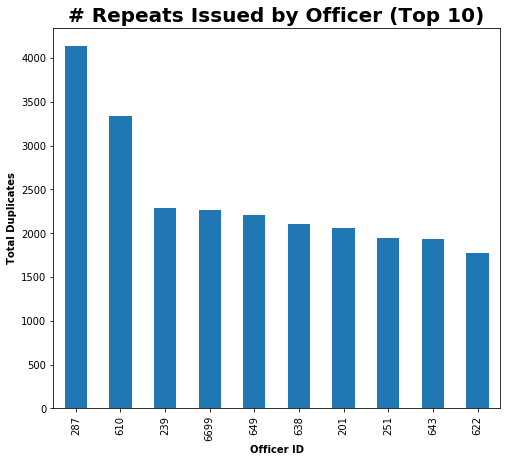

In [67]:
# Top 10 officers with regard to most repeats issued 
repeat["officer"].value_counts()[:10].plot(kind="bar",figsize=(8,7))
plt.title("# Repeats Issued by Officer (Top 10)",weight="bold",fontsize=20)
plt.xlabel("Officer ID",weight="bold",fontsize=10)
plt.ylabel("Total Duplicates",weight="bold",fontsize=10)
plt.show()

<h>Ratio of first tickets to duplicates<h>
<b><b>

In [27]:
data.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,notice_number,dismissal_reason,officer,normalized_address,year,month,hour,ward,geocode_accuracy,geocode_accuracy_type,geocoded_address,geocoded_lng,geocoded_lat,group_id,is_repeat
0,16112970,1996-01-01 01:32:00,2046 W 35TH ST,2fb0ff4c6bd7d2964a7e89c83c8ed9770f45798ebcdc2d...,IL,ENV,000000000,0964140B,PARK OR STAND IN BUS/TAXI/CARRIAGE STAND,NaN,Unidentified,NISS,30,60,0,0.0,Dismissed,2002-01-21 00:00:00,NaN,0,NaN,006285,"2000 w 35th st, Chicago, IL",1996,1,1,12,1,rooftop,"2000 W 35th St, Chicago, IL 60609",-87.675509,41.830668,27980,0
1,16987130,1996-01-01 01:35:00,2046 W 35TH ST,2fb0ff4c6bd7d2964a7e89c83c8ed9770f45798ebcdc2d...,IL,ENV,000000000,0964140B,PARK OR STAND IN BUS/TAXI/CARRIAGE STAND,NaN,Unidentified,NISS,30,60,0,0.0,Dismissed,2002-01-21 00:00:00,NaN,0,NaN,013605,"2000 w 35th st, Chicago, IL",1996,1,1,12,1,rooftop,"2000 W 35th St, Chicago, IL 60609",-87.675509,41.830668,27980,1
2,16986898,1996-01-01 07:01:00,4324 N DAYTON,a05db864ccce5053f575acba9e99b5975379f2c091935d...,IL,PAS,606130000,0964150B,PARKING/STANDING PROHIBITED ANYTIME,NaN,Unidentified,OLDS,30,60,60,0.0,Notice,1996-04-03 00:00:00,DLS,5013387430,NaN,018973,"4300 n dayton, Chicago, IL",1996,1,7,46,1,range_interpolation,"4300 N Dayton St, Chicago, IL 60613",-87.651167,41.960608,27315,0
3,17226107,1996-01-01 07:53:00,2771 E 75TH,71b4a38c6ed1dd00fda343138bd3bd3c88b1a13c95fda0...,IL,PAS,606490000,0964150B,PARKING/STANDING PROHIBITED ANYTIME,NaN,Unidentified,TOYT,30,60,60,0.0,Notice,1996-04-03 00:00:00,SEIZ,5019417380,NaN,004157,"2700 e 75th, Chicago, IL",1996,1,7,7,1,rooftop,"2700 E 75th Pl, Chicago, IL 60649",-87.55904,41.758323,24429,0
4,17435934,1996-01-01 08:09:00,1312 E 55TH ST,e2fa8932ee5de8389f59e9f1b5c6290b1d61a0f5d94b55...,IL,PAS,000000000,0964150B,PARKING/STANDING PROHIBITED ANYTIME,NaN,Unidentified,OLDS,30,60,0,0.0,Dismissed,2002-01-21 00:00:00,NaN,0,NaN,016317,"1300 e 55th st, Chicago, IL",1996,1,8,4,1,range_interpolation,"1300 E 55th St, Chicago, IL 60615",-87.594923,41.795247,30391,0


In [46]:
# Officer how handed out most duplicates generated $205,932.77 in 
# repeat ticket revenue
repeat.groupby("officer")["total_payments"].sum()["287"]

205932.77

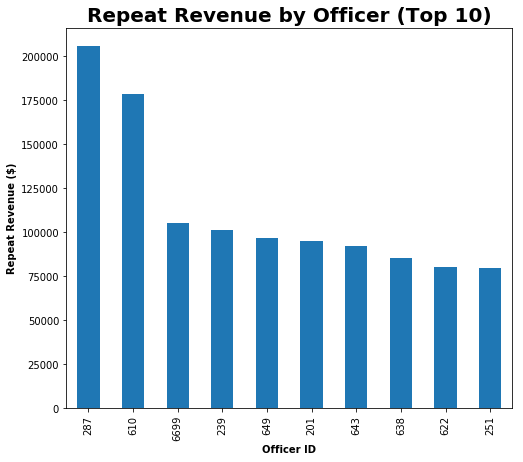

In [50]:
# Top 10 officers with regards to most revenue generated off of repeats
repeat.groupby("officer")["total_payments"].sum().sort_values(ascending=False)[:10].plot(kind="bar",figsize=(8,7))
plt.title("Repeat Revenue by Officer (Top 10)",weight="bold",fontsize=20)
plt.xlabel("Officer ID",weight="bold",fontsize=10)
plt.ylabel("Repeat Revenue ($)",weight="bold",fontsize=10)
plt.show()

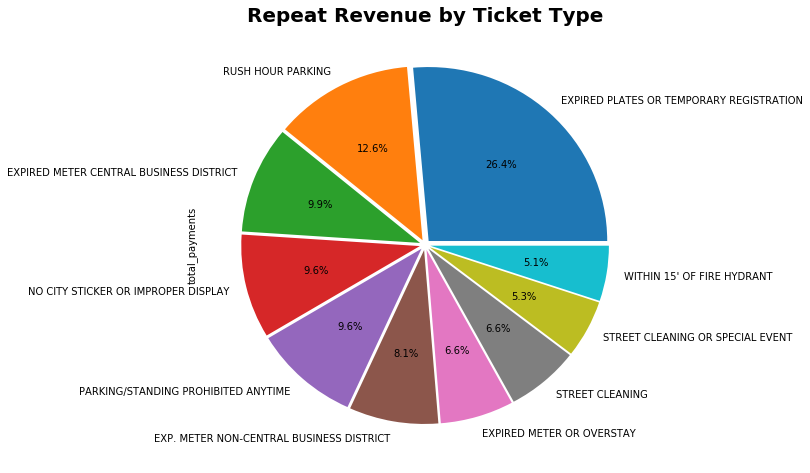

In [65]:
# Revenue earned by top 10 ticket violations
explode = [0.03] * 10
repeat.groupby("violation_description")["total_payments"].sum().sort_values(ascending=False)[:10].plot(kind="pie",figsize=(8,8),autopct='%.1f%%', labeldistance=1.1,explode=explode,)
plt.title("Repeat Revenue by Ticket Type",weight="bold",fontsize=20)
#leg = plt.legend(loc="lower left")
plt.show()